# ESCUELA POLITÉCNICA NACIONAL

## MÉTODOS NUMÉRICOS

### TAREA 6

David Alejandro Puga Novoa - GR1CC - 27/11/2024

### CONJUNTO DE EJERCICIOS

#### Determine el orden de la mejor aproximación para las siguientes funciones, usando la Serie de Taylor y el Polinomio de Lagrange:

1. $\frac{1}{25x^2 + 1} , x_0 = 0$

2. $\arctan{x} , x_0 = 1$

Empezaremos utilizando librerias para realizar lo solicitado y las funciones para mostrar gráficamente:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable
import sympy as sym

def taylor_approx(fcn: Callable[[float], float], x0: float, n: int) -> sym.Symbol:
    x = sym.symbols("x")
    f = sym.sympify(fcn(x))
    taylor: sym.Symbol = 0
    for i in range(n + 1):
        term = f.diff(x, i).subs(x, x0) / sym.factorial(i) * (x - x0) ** i
        taylor += term
    return taylor

#### 1. Sea $f(x) = -x^3 - \cos{x}$ y $p_0 = -1$. Use el método de Newton y de la Secante para encontrar $p_1$. ¿Se podría usar $p_0 = 0$?

Para newton, necesitamos la derivada de la función anterior. Como resultado: $f'(x) = -3x^2 + \sin{x}$

Llamamos a la función Newton con los parámetros que tenemos:

In [2]:
from scipy.optimize import newton
import math

def fprime(x):
    return -3*x**2 + math.sin(x)

p1 = newton(func = lambda x : -x**3 - math.cos(x), x0 = -1, fprime = fprime)
print(p1)

-0.8654740331016144


Y para la secante no necesitamos la derivada:

In [3]:
p1 = newton(func = lambda x : -x**3 - math.cos(x), x0 = -1)
print(p1)

-0.8654740331016144


Como punto aproximado es una mala elección por eso para newton implica que en $p_0 = 0$ la derivada sea cero, algo no permitido mientras que en la secante el punto produce complicaciones por la presencia de multiplicaciones para cero.

In [4]:
p1 = newton(func = lambda x : -x**3 - math.cos(x), x0 = 0)
print(p1)

-4.998000183473029e-09


#### 2. Encuentre soluciones precisas dentro de $10^{-4}$ para los siguientes problemas.

a) $x^3 - 2x^2 - 5 = 0$, $[1, 4]$

Con secante podemos obtener:

In [5]:
p1 = newton(func = lambda x : x**3 - 2*x**2 - 5, x0 = 1, tol = 10e-4, x1 = 4)
print(p1)

2.6906484961992585


b) $x^3 + 3x^2 - 1 = 0$, $[-3, -2]$

In [6]:
p1 = newton(func = lambda x : x**3 + 3*x**2 - 1, x0 = -3, tol = 10e-4, x1 = -2)
print(p1)

-2.879385194736809


c) $x - \cos{x} = 0$, $[0, \frac{\pi}{2}]$

In [7]:
p1 = newton(func = lambda x : x - math.cos(x), x0 = 0, tol = 10e-4, x1 = math.pi/2)
print(p1)

0.7390834365030763


d) $x - 0.8 - 0.2\sin{x} = 0$, $[0, \frac{\pi}{2}]$

In [8]:
p1 = newton(func = lambda x : x - 0.8 - 0.2*math.sin(x), x0 = 0, tol = 10e-4, x1 = math.pi/2)
print(p1)

0.9643338835706312


#### 3. Use los 2 métodos en esta sección para encontrar las soluciones dentro de $10^{-5}$ para los siguientes problemas.

a) $3x - e^{x} = 0$ para $1 \leq x \leq 2$ 

Primero calculamos la derivada de la función: $3 - e^{x}$, de esta manera ya podemos usar newton:

In [9]:
p1 = newton(func = lambda x : 3*x - math.exp(x), x0 = 1,
           fprime = lambda x : 3 - math.exp(x), tol = 10e-5, x1 = 2)
print(p1)

0.6190612833553127


Ahora el segundo método en usar sera el de la secante:

In [10]:
p1 = newton(func = lambda x : 3*x - math.exp(x), x0 = 1, tol = 10e-5, x1 = 2)
print(p1)

1.5121345517620621


Los dos encontraron raíces diferentes esto es porque newton encontró una fuera del intervalo dado debido a los puntos dados y a su vez la pendiente convergía hacia la izquierda.

b) $2x + 3\cos{x} - e^{x} = 0$ para $1 \leq x \leq 2$

Primero calculamos la derivada de la función: $2 - 3\sin{x} - e^{x}$, de esta manera ya podemos usar newton:

In [11]:
p1 = newton(func = lambda x : 2*x + 3*math.cos(x) - math.exp(x),
            x0 = 1,
           fprime = lambda x : 2 - 3*math.sin(x) - math.exp(x),
            tol = 10e-5, x1 = 2)
print(p1)

1.2397146979752596


Ahora el método de la secante:

In [12]:
p1 = newton(func = lambda x : 2*x + 3*math.cos(x) - math.exp(x), 
            x0 = 1, tol = 10e-5, x1 = 2)
print(p1)

1.2397146920815107


#### 4. El polinomio de cuarto grado

$$f(x) = 230x^4 + 18x^3 + 9x^2 - 221x - 9$$

#### tiene dos ceros reales, uno en $[-1, 0]$ y el otro en $[0, 1]$. Intente aproximar estos ceros dentro de $10^{-6}$ con:

a) El método de la secante

Para el primer intervalo $[-1, 0]$:

In [13]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9, 
            x0 = -1, tol = 10e-6, x1 = 0)
print(p1)

-0.04065928497591696


Para el segundo intervalo $[0, 1]$:

In [14]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9, 
            x0 = 1, tol = 10e-6)
print(p1)

0.9623984191155153


b) El método de Newton

Primero empezamos sacando su derivada: $920x^3 + 54x^2 + 18x - 221$

Como se solicita un punto medio de estimación inicial, para el primer intervalo $[-1, 0]$ con su mediana $-0.5$:

In [15]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9,
            x0 = -0.5,
           fprime = lambda x : 920*x**3 + 54*x**2 + 18*x -221,
            tol = 10e-6)
print(p1)

-0.04065928831575899


Para el segundo intervalo $[0, 1]$ de igual manera usaremos $1$

In [16]:
p1 = newton(func = lambda x : 230*x**4 + 18*x**3 + 9*x**2 - 221*x - 9,
            x0 = 1,
           fprime = lambda x : 920*x**3 + 54*x**2 + 18*x -221,
            tol = 10e-6)
print(p1)

0.9623984187505414


#### 5. La función $f(x) = \tan{\pi x} - 6$ tiene cero en $(\frac{1}{\pi})$ arcotangente $6 \approx 0.447431543$. Sea $p_0 = 0$ y $p_1 = 0.48$ y use 10 iteraciones en cada uno de los siguientes métodos para aproximar esta raíz. ¿Cuál método es más eficaz y por qué?

a) Método de bisección

Pimero necesitaremos el código para su obtención:

In [17]:
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0
    
from typing import Callable

def bisection(
    a: float, b: float, *, equation: Callable[[float], float], N: int
) -> tuple[float, int] | None:
    i = 1
    
    assert a < b, "a not lower than b, the interval is not valid."

    assert (
        equation(a) * equation(b) < 0
    ), "The function does not change sign over the interval."

    Fa = equation(a)
    p = a 
    for i in range(N + 1):
        p = a + (b - a) / 2
        FP = equation(p)
        
        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
            
        else:
            b = p

    return p, i

Ahora procedemos a usar el método de bisección con los datos dados:

In [27]:
p, i = bisection(a = 0, b = 0.48, 
                 equation =  lambda x : math.tan(math.pi*x) - 6,
                N = 10)
print(f"Raíz: {p} en {i} iteraciones")

Raíz: 0.44742187499999997 en 10 iteraciones


b) Método de Newton

Como siempre primero necesitamos su derivada: $\pi \sec^2{\pi x}$ y usamos el algoritmo,

In [18]:
p1 = newton(func = lambda x : math.tan(math.pi*x) - 6,
            x0 = 0,
           fprime = lambda x : math.pi*(1/math.cos(math.pi*x))**2,
           maxiter = 10, x1 = 0.48)
print(p1)

RuntimeError: Failed to converge after 10 iterations, value is 13.655012218324751.

Los errores comentan que la pendiente tiende a converger hacia los valores mínimos.

c) Método de la Secante

Usamos el algoritmo con los parámetros:

In [19]:
p1 = newton(func = lambda x : math.tan(math.pi*x) - 6,
            x0 = 0, maxiter = 10, x1 = 0.48)
print(p1)

RuntimeError: Failed to converge after 10 iterations, value is -3694.358600967476.

El resultado al realizar con los 3 métodos es que el método de la bisección es más efectivo en este caso en cuanto a hallar una raíz en la función. 

Los métodos newton y secante tienden a manejarse en cuanto a pendiente o a una línea que entre corta el eje x lo que genera que en cálculos se salen del intervalo, destacar tambien que otra razón es la propia función porque no es continua respecto a los reales.

#### 6. La función descrita por $f(x) = \ln{(x^2 + 1)} - e^{0.4x}\cos{\pi x}$ tiene un número infinito de ceros. 

a) Determine, dentro de $10^{-6}$, el único cero negativo.

Utilizamos método de la secante:

In [20]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x),
            x0 = -0.4, tol = 10e-6)
print(p1)

-0.43414304724770203


b) Determine, dentro de $10^{-6}$, los cuatro ceros positivos más pequeños.

Por método de la secante:

In [21]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x),
            x0 = 0.5, tol = 10e-6)
print(p1)

0.4506567478906115


In [22]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x),
            x0 = 1.5, tol = 10e-6)
print(p1)

1.7447380533760186


In [23]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x),
            x0 = 2.5, tol = 10e-6)
print(p1)

2.2383197950776066


In [24]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x),
            x0 = 3.5, tol = 10e-6)
print(p1)

3.7090412014166936


c) Determine una aproximación inicial razonable para encontrar el enésimo cero positivo más pequeño de $f$

Utilizamos geogebra para visualizar la función,

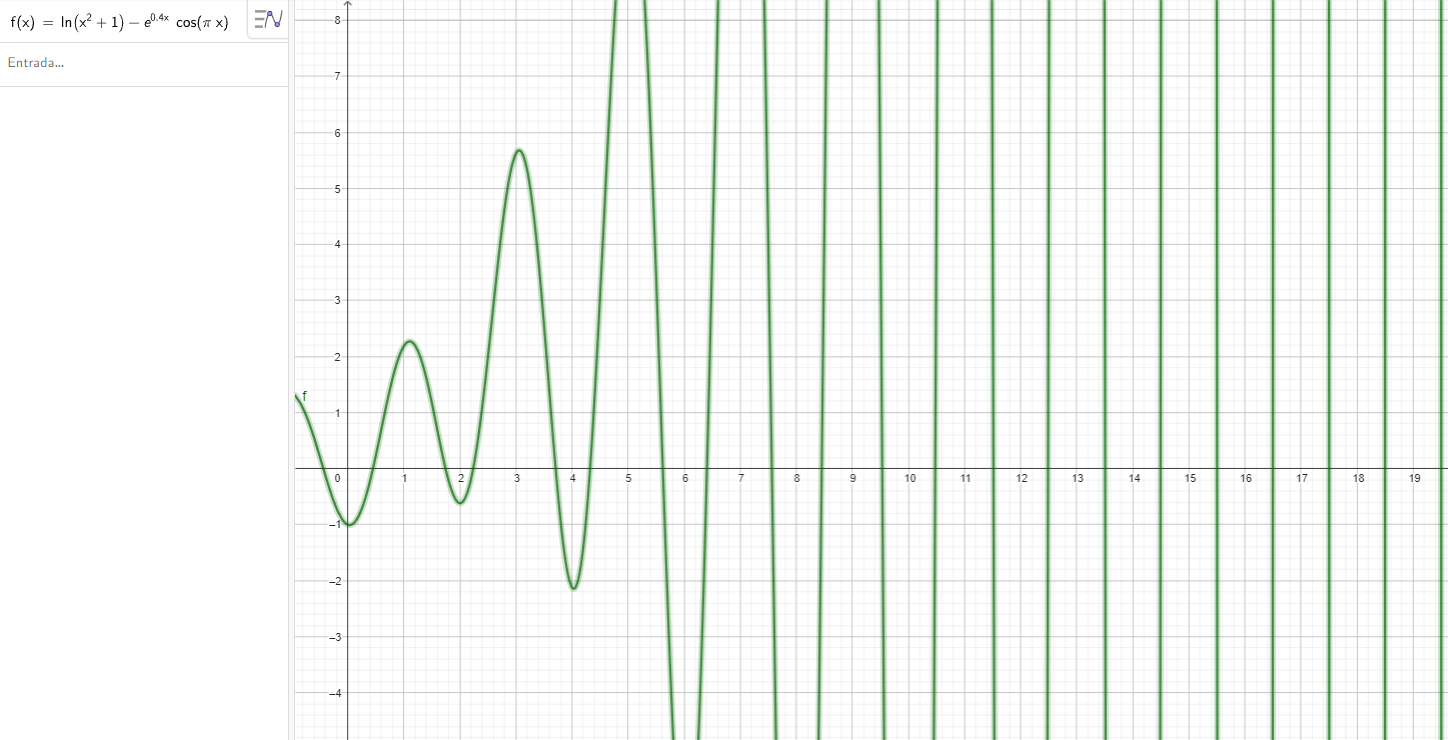

Existen infinitas raíces positivas según el gráfico la función pero podemos observar que las raíces tienden a estar cerca de un número entero 0.5 por lo que podemos usar esto como punto de aproximación para encontrar la enésima raíz de esta función.

La fórmula dada es: $n - 0.5$, tal que $n$ representa una aproximación a la enésima raíz positiva $n \in \mathbb{N} - \{0\}$.

Asi que empleamos método de la secante y tenemos:

In [25]:
p1 = newton(func = lambda x : math.log(x**2 + 1) - math.exp(0.4*x)*math.cos(math.pi*x),
            x0 = 24.5, tol = 10e-6)
print(p1)

24.49988704757148


#### 7. La función $f(x) = x^{\frac{1}{3}}$ tiene raíz en $x = 0$.Usando el punto de inicio de $x = 1$ y $p_0 = 5$, $p_1 = 0.5$ para el método de secante, compare los resultados de los métodos de la secante y de Newton.

Empezamos con el método de la secante:

In [26]:
p1 = newton(func = lambda x : x**(1/3) + 1, x0 = 1)
print(p1)

/tmp/ipykernel_2777/4142060945.py:1: RuntimeWarning: invalid value encountered in scalar power
  p1 = newton(func = lambda x : x**(1/3) + 1, x0 = 1)


RuntimeError: Failed to converge after 50 iterations, value is nan.

Con método de newton debemos obtener la derivada entonces: $\frac{1}{3x^{\frac{2}{3}}}$. 

Llamados a la función de Newton:

In [27]:
p1 = newton(func = lambda x : x**(1/3), x0 = 1,
            fprime = lambda x : 1 / (3*x**(2/3)))
print(p1)

/tmp/ipykernel_2777/3932985158.py:1: RuntimeWarning: invalid value encountered in scalar power
  p1 = newton(func = lambda x : x**(1/3), x0 = 1,
/tmp/ipykernel_2777/3932985158.py:2: RuntimeWarning: invalid value encountered in scalar power
  fprime = lambda x : 1 / (3*x**(2/3)))


RuntimeError: Failed to converge after 50 iterations, value is nan.

En ambos casos existe el error de no convergencia esto se genera básicamente por el cero. Además solo existe una única raíz existente para esa función que tiene una pendiente igual a cero 0.